<a href="https://colab.research.google.com/github/Jay-mishra04/SmartPhone_Price_Prediction/blob/master/Smartphone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMARTPHONE PRICE PREDICTION  (Supervised Machine Learning)

# Step 1: Define the Problem Statement

I am making a Smartphone Price Prediction Machine Learning Algorithm. This Algorithm would be able to predict the price of the any smartphone on giving the inputs like Brand, Camera, Battery etc. This is a Supervised Machine Learning algorithm, which means it needs target variable for training the models.

# Step 2: Data Collection
- For the data collection I have performed Web Scraping on Flipkart.
- Note - I have already performed the Web Sraping part using Jupyter Notebook, and saved the csv file into the Google Drive, so I am not Executing the below cell as it will take time to Webscrape the Data again.

In [ ]:
# # Code related to Web Scraping
# # Importing all the necessary libraries

# import requests
# from bs4 import BeautifulSoup
# import numpy as np
# import pandas as pd

# brand = []
# memory = []
# screen = []
# camera = []
# battery = []
# processor = []
# rating = []
# reviews = []
# price = []

# for i in range(1, 200):
#     r = requests.get(f"https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}")
#     soup = BeautifulSoup(r.text, "lxml")
#     box = soup.find_all("div", class_ = "col col-7-12")

#     for i in box:
#         name = i.find("div", class_="_4rR01T")
#         name_text = name.text.strip() if name else np.nan
#         brand.append(name_text)

#         details = i.find("ul", class_ = "_1xgFaf")

#         mem = details.find_all("li")[0]
#         mem_text = mem.text.strip() if mem else np.nan
#         memory.append(mem_text)

#         scrn = details.find_all("li")[1]
#         scrn_text = scrn.text.strip() if scrn else np.nan
#         screen.append(scrn_text)


#         cmra = details.find_all("li")[2]
#         cmra_text = cmra.text.strip() if cmra_tag else np.nan
#         camera.append(cmra_text)

#         batry = details.find_all("li")[3]
#         batry_text = batry.text.strip() if batry else np.nan
#         battery.append(batry_text)

#         process = details.find_all("li")[4]
#         process_text = process.text.strip() if process else np.nan
#         processor.append(process_text)

#         rtng = i.find("div", class_="_3LWZlK")
#         rtng_text = rtng.text.strip() if rtng else np.nan
#         rating.append(rtng_text)

#         rvw = i.find("span", class_= "_2_R_DZ")
#         rvw_text = rvw.text.strip() if rvw else np.nan
#         reviews.append(rvw_text)


#     price_box = soup.find_all("div", class_="col col-5-12 nlI3QM")
#     for i in price_box:
#         prce = i.find("div", class_ ="_30jeq3 _1_WHN1")
#         prce_text = prce.text.strip() if prce else np.nan
#         price.append(prce_text)


# dic = {"Brand" : brand, "Memory" : memory, "Camera" : camera,  "Batter" : battery,
#        "Processor" : processor, "Ratings" : rating, "Reviews" : reviews, "Price" : price}

# df = pd.DataFrame(dic)

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [137]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv("/content/drive/MyDrive/projects/Machine Learning Project (SmartPhone Price Prediction)/smartphone.csv")

In [138]:
df.head()

,Brand,Memory,Camera,Battery,Processor,Ratings,Reviews,Price
0,"Infinix Note 30 5G (Sunset Gold, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 2 TB,108 MP + 2 MP+ AI Lens | 16MP Front Camera,5000 mAh Li-ion Polymer Battery,Dimensity 6080 Processor,4.2,"81,666 Ratings & 8,897 Reviews","₹14,999"
1,"REDMI 12 5G (Moonstone Silver, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon 4 Gen 2 Processor,4.3,"17,785 Ratings & 1,158 Reviews","₹12,999"
2,"Apple iPhone 15 (Black, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",1 Year Warranty for Phone and 6 Months Warrant...,4.6,"13,517 Ratings & 921 Reviews","₹65,999"
3,"Motorola G34 5G (Ice Blue, 128 GB)",8 GB RAM | 128 GB ROM,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,4.2,"6,022 Ratings & 836 Reviews","₹11,999"
4,"vivo T2 5G (Nitro Blaze, 128 GB)",8 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,4500 mAh Battery,Snapdragon 695 Processor,4.3,"16,572 Ratings & 1,166 Reviews","₹17,999"


- Above is the collected dataset containing information about the smartphones
- Columns are Brand, Memory, Camera, Battery, Processor, Ratings, Reviews and Price
- Brand includes the names of brand of the smartphones in different rows
- Memory contains information about the ROM and ROM
- Camera cantains the number and the megapixels of both the front and the Rear Cameras
- Battery contains the size of the Battery in mAh
- Rating contains the Ratings given by the customers to different smartphones
- Reviews contains the number of customers which has rated the smartphone and written the Reviews about the smartphone
- Price includes the amount you have give in order to purchase the smartphone

# Step 3: Data Preprocessing

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      984 non-null    object 
 1   Memory     984 non-null    object 
 2   Camera     984 non-null    object 
 3   Battery    984 non-null    object 
 4   Processor  984 non-null    object 
 5   Ratings    979 non-null    float64
 6   Reviews    979 non-null    object 
 7   Price      983 non-null    object 
dtypes: float64(1), object(7)
memory usage: 61.6+ KB


In [140]:
# checking for null values
df.isnull().sum()

Brand        0
Memory       0
Camera       0
Battery      0
Processor    0
Ratings      5
Reviews      5
Price        1
dtype: int64

In [141]:
# dropping the null values
df.dropna(inplace =True)

In [142]:
# checking the duplicates values
df.duplicated().sum()

313

In [143]:
# dropping the duplicate values
df.drop_duplicates(inplace=True)

In [144]:
df.duplicated().sum()

0

In [145]:
# taking out the brand name to a separate column
df["Brand_name"] = df["Brand"].str.split().str[0]

In [146]:
df.sample(3)

,Brand,Memory,Camera,Battery,Processor,Ratings,Reviews,Price,Brand_name
462,"I Kall Z19 Ultra Plus (Gold, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 128 GB,13MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Octa Core Processor,3.7,314 Ratings & 14 Reviews,"₹8,059",I
470,"Tecno Pova 5 Pro 5G (Silver Fantasy, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,50MP + 0.08MP | 16MP Front Camera,5000 mAh Battery,MediaTek Dimensity 6080 MT6833 Processor,4.4,112 Ratings & 13 Reviews,"₹17,429",Tecno
703,"realme Narzo N53 (Feather Black, 128 GB)",6 GB RAM | 128 GB ROM,50MP Rear Camera,5000 mAh Battery,Domestic 1 Year on Handset and 6 Months on Acc...,4.2,"4,475 Ratings & 229 Reviews","₹10,454",realme


In [147]:
# making a separate column for the availability of the 5g phones
df["5G"] = df["Brand"].apply(lambda x : 1 if "5G" in x else 0)

In [148]:
# making a function which will store the RAM values in separate column
# as the ram of all the apple smartphones are not given
# so this function will assign ram = 4GB where ever it will find the apple smartphones
# 4GB is the average value of the ram size of apple smartphones

def ram_splitter(brand, memory):
    brand = str(brand)
    memory = str(memory)

    if "RAM" in memory:
        return memory.split("|")[0]
    elif "Apple" in brand:
        return "4GB"
    else:
        return 0

df["RAM"] = df[["Brand_name", "Memory"]].apply(lambda x: ram_splitter(x["Brand_name"], x["Memory"]), axis=1)

In [149]:
# making a function which will store the ROM values in separate column
def extract_rom(memory):

    memory_parts = memory.split("|")

    rom = None

    for part in memory_parts:
        part = part.strip()

        if "GB ROM" in part or "TB ROM" in part:
            rom = part.replace("ROM", "").strip()

    return rom

df["ROM"] = df["Memory"].apply(extract_rom)

In [150]:
df.sample(3)

,Brand,Memory,Camera,Battery,Processor,Ratings,Reviews,Price,Brand_name,5G,RAM,ROM
947,"SAMSUNG Galaxy Z Fold4 5G (Graygreen, 512 GB)",12 GB RAM | 512 GB ROM,50MP + 12MP + 10MP | 10MP Front Camera,4400 mAh Lithium Ion Battery,Qualcomm Snapdragon 8+ Gen 1 Processor,3.1,85 Ratings & 9 Reviews,"₹1,24,999",SAMSUNG,1,12 GB RAM,512 GB
713,itel U30 keypad Mobile|1200 mAh battery|Expand...,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,0.3MP + 0MP | 0MP Front Camera,1200 mAh Battery,Unisoc Processor,4.1,126 Ratings & 5 Reviews,₹995,itel,0,32 MB RAM,None
954,"SAMSUNG Galaxy A53 (Awesome Blue, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,5000 mAh Lithium Ion Battery,Exynos Octa Core Processor Processor,4.2,"1,755 Ratings & 181 Reviews","₹33,499",SAMSUNG,0,8 GB RAM,128 GB


In [151]:
# separate columns for the back_camera and the front camera
df["Main_camera"] = df["Camera"].apply(lambda x: x.split("|")[0] if "|" in x else x)
df["Front_camera"] = df["Camera"].apply(lambda x: x.split("|")[1] if "|" in x else 0)

In [152]:
# separate columns for the processor_name, rating and reviews
df["Processor_name"] = df["Processor"].str.split().str[0]
df["Ratings_count"] = df["Reviews"].str.split("&").str[0]
df["Reviews_count"] = df["Reviews"].str.split("&").str[1]

In [153]:
df.sample(3)

,Brand,Memory,Camera,Battery,Processor,Ratings,Reviews,Price,Brand_name,5G,RAM,ROM,Main_camera,Front_camera,Processor_name,Ratings_count,Reviews_count
452,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",12 GB RAM | 256 GB ROM,200MP (OIS) + 8MP + 2MP | 16MP Front Camera,5100 mAh Battery,7s Gen 2 Mobile Platform 5G Processor,4.3,660 Ratings & 93 Reviews,"₹29,999",REDMI,1,12 GB RAM,256 GB,200MP (OIS) + 8MP + 2MP,16MP Front Camera,7s,660 Ratings,93 Reviews
389,SAMSUNG Galaxy M34 5G without charger (Prism S...,6 GB RAM | 128 GB ROM,50MP Rear Camera,6000 mAh Battery,Domestic 1 Year of Device & 6 Months for In-Bo...,4.2,"2,120 Ratings & 181 Reviews","₹16,027",SAMSUNG,1,6 GB RAM,128 GB,50MP Rear Camera,0,Domestic,"2,120 Ratings",181 Reviews
669,"OPPO F21s Pro (Dawnlight Gold, 128 GB)",8 GB RAM | 128 GB ROM,64MP + 2MP + 2MP | 32MP Front Camera,4500 mAh Battery,Snapdragon 680 Processor,4.2,"1,517 Ratings & 97 Reviews","₹27,999",OPPO,0,8 GB RAM,128 GB,64MP + 2MP + 2MP,32MP Front Camera,Snapdragon,"1,517 Ratings",97 Reviews


In [154]:
# dropping the columns which are no longer needed
df.drop(columns = ["Brand", "Memory", "Camera", "Processor"], inplace = True)

In [155]:
# making average size of the iphone battery = 3000
df["Battery_mAh"] = df["Battery"].apply(lambda x: x.split("mAh")[0] if "mAh" in x else 3000)

In [156]:
# dropping the columns which are no longer needed
df.drop(columns=["Battery", "Reviews"], inplace = True)

In [157]:
# making the columns data to integers
def make_integer(row):
    row = str(row)
    integers= []
    for i in row:
        if i.isdigit():
            integers.append(i)
    return "".join(integers)

In [158]:
df["Price"] = df["Price"].apply(make_integer)
df["Ratings_count"] = df["Ratings_count"].apply(make_integer)
df["Reviews_count"] = df["Reviews_count"].apply(make_integer)
df["Front_camera"] = df["Front_camera"].apply(make_integer)

In [159]:
# making a function which will assign "bionic" to apple processor
def apple_processor(name, processor):
    name = str(name)
    processor = str(processor)

    if name == "Apple":
        return "Bionic"
    else:
        return processor

df["Processor_name"] = df[["Brand_name", "Processor_name"]].apply(lambda x : apple_processor(x["Brand_name"], x["Processor_name"]), axis=1)

In [160]:
# categorize the processor into few categories
def processor_name(row):
    row = str(row)

    if row == "Bionic":
        return row
    elif row == "Qualcomm" or row == "Snapdragon":
        return "Snapdragon"
    elif row == "Mediatek" or row == "MediaTek" or row == "Helio" or row == "Dimensity":
        return "Mediatek"
    else:
        return "Others"

df["Processor_name"] = df["Processor_name"].apply(processor_name)

In [161]:
df["Processor_name"].value_counts()

Processor_name
Others        279
Mediatek      221
Snapdragon    110
Bionic         55
Name: count, dtype: int64

In [162]:
# adding all the megapixel of the back cameras
def total_megapixels(camera):
    camera = str(camera)
    if "MP" in camera:
        cameras = camera.split("+")

        total_mp = 0


        for cam in cameras:

            mp_str = ''.join(filter(str.isdigit, cam))
            mp = int(mp_str) if mp_str else 0
            total_mp += mp

        return total_mp
    else:
        return 0
df["Back_camera_sum"] = df["Main_camera"].apply(total_megapixels)

In [163]:
def rom(row):
    row = str(row)

    if "TB" in row:
        return "1000"
    else:
        return row.split()[0]

df["ROM"] = df["ROM"].apply(rom)

In [164]:
df = df.drop(df[df["ROM"] == "nan"].index)

In [165]:
df["RAM"].value_counts()

RAM
8 GB RAM      231
4 GB RAM      147
6 GB RAM      116
12 GB RAM      64
4GB            55
3 GB RAM       23
2 GB RAM       17
16 GB RAM       7
8 MB RAM        1
3 MB RAM        1
32 MB RAM       1
4 MB RAM        1
64 GB RAM       1
Name: count, dtype: int64

In [166]:
# removing the GB term from the RAM
def ram(row):
    row = str(row)

    if "GB" in row:
        return row.split("GB")[0]
    else:
        return 0
df["RAM"] = df["RAM"].apply(ram)

In [167]:
# removing the outliers
df = df.drop(df[df["RAM"] == "64 "].index)

In [168]:
df.drop(columns = ["Main_camera"], inplace = True)

In [169]:
df = df.drop(df[df["ROM"] == "None"].index)
df["ROM"].value_counts()

ROM
128     347
256     148
64      115
512      22
32       22
1000      5
16        2
Name: count, dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661 entries, 0 to 983
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ratings          661 non-null    float64
 1   Price            661 non-null    object 
 2   Brand_name       661 non-null    object 
 3   5G               661 non-null    int64  
 4   RAM              661 non-null    object 
 5   ROM              661 non-null    object 
 6   Front_camera     661 non-null    object 
 7   Processor_name   661 non-null    object 
 8   Ratings_count    661 non-null    object 
 9   Reviews_count    661 non-null    object 
 10  Battery_mAh      661 non-null    object 
 11  Back_camera_sum  661 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 67.1+ KB


In [171]:
df.sample(5)

,Ratings,Price,Brand_name,5G,RAM,ROM,Front_camera,Processor_name,Ratings_count,Reviews_count,Battery_mAh,Back_camera_sum
309,4.2,12999,Infinix,1,8,128,8,Mediatek,24684,2183,6000,50
545,4.7,148900,Apple,0,4,256,12,Bionic,369,31,3000,72
225,4.4,10999,realme,0,6,128,8,Others,101349,4605,5000,110
508,4.1,10999,REDMI,0,6,64,13,Snapdragon,29745,2423,5000,60
374,4.3,9480,realme,0,4,64,0,Others,2596,150,5000,64


In [172]:
def brand_collection(row):
    row = str(row)

    if "REDMI" in row or "vivo" in row or "realme" in row or "POCO" in row or "Motorola" in row or "Infinix" in row or "OPPO" in row or "Apple" in row or "Google" in row or "OnePlus" in row:
        return row
    elif "SAMSUNG" in row or "Samsung" in row:
        return "Samsung"
    else:
        return "Others"

df["Brand_name"] = df["Brand_name"].apply(brand_collection)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661 entries, 0 to 983
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ratings          661 non-null    float64
 1   Price            661 non-null    int64  
 2   Brand_name       661 non-null    object 
 3   5G               661 non-null    int64  
 4   RAM              661 non-null    object 
 5   ROM              661 non-null    object 
 6   Front_camera     661 non-null    object 
 7   Processor_name   661 non-null    object 
 8   Ratings_count    661 non-null    object 
 9   Reviews_count    661 non-null    object 
 10  Battery_mAh      661 non-null    object 
 11  Back_camera_sum  661 non-null    int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 67.1+ KB


In [176]:
# make price as integer
df['Price'] = df['Price'].astype("int")
df["Ratings"] = df["Ratings"].astype("object")
df['5G'] = df["5G"].astype("object")
df["Ratings_count"] = df["Ratings_count"].astype("int")
df["Reviews_count"] = df["Reviews_count"].astype('int')


In [178]:
df.columns

Index(['Ratings', 'Price', 'Brand_name', '5G', 'RAM', 'ROM', 'Front_camera',
       'Processor_name', 'Ratings_count', 'Reviews_count', 'Battery_mAh',
       'Back_camera_sum'],
      dtype='object')

In [180]:
col = ['Ratings', 'Brand_name', '5G', 'RAM', 'ROM', 'Front_camera',
       'Processor_name', 'Battery_mAh', 'Back_camera_sum']

for i in col:
    print("Column name:", i)
    print("Unique counts:", df[i].nunique())
    print("Unique values:", list(df[i].unique()))
    print("\n")

Column name: Ratings
Unique counts: 16
Unique values: [4.2, 4.3, 4.6, 4.4, 4.0, 4.5, 4.1, 4.7, 3.7, 4.9, 5.0, 3.8, 3.9, 3.5, 3.1, 3.2]


Column name: Brand_name
Unique counts: 12
Unique values: ['Infinix', 'REDMI', 'Apple', 'Motorola', 'vivo', 'POCO', 'Samsung', 'OnePlus', 'realme', 'Others', 'OPPO', 'Google']


Column name: 5G
Unique counts: 2
Unique values: [1, 0]


Column name: RAM
Unique counts: 9
Unique values: ['8 ', '6 ', '4', '4 ', '12 ', '2 ', '3 ', '16 ', 0]


Column name: ROM
Unique counts: 7
Unique values: ['256', '128', '64', '512', '32', '1000', '16']


Column name: Front_camera
Unique counts: 17
Unique values: ['16', '8', '12', '50', '5', '0', '32', '13', '10', '55', '207', '108', '105', '20', '2', '88', '1616']


Column name: Processor_name
Unique counts: 4
Unique values: ['Mediatek', 'Snapdragon', 'Bionic', 'Others']


Column name: Battery_mAh
Unique counts: 26
Unique values: ['5000 ', 3000, '4500 ', '6000 ', '4600 ', '5100 ', '4700 ', '4400 ', '3700 ', '4000 ', '4270 

### Steps performed in Data Cleaning:
- Removed the null values
- Removed the Duplicate rows
- Created separate columns for RAM and ROM
- Created separate columns for Rear Camera and Back Camera
- Created separate columns for Reviews and Ratings
- Converted the data types to integers of the relevant columns
- Categorize all the processor into 4 groups (Mediatek, Snapdragon, Bionic and others)
- Added all the megapixels of the back camera
- Removed all the non-relevant columns

# Step 4: Exploratory Data Analysis (EDA)

In [183]:
df.describe()

,Price,Ratings_count,Reviews_count,Back_camera_sum
count,661.000000,6.610000e+02,661.000000,661.000000
mean,26993.972769,3.494355e+04,2474.366112,69.054463
std,29309.320067,7.858881e+04,6228.512029,198.075460
min,4999.000000,1.000000e+01,1.000000,8.000000
25%,10074.000000,7.990000e+02,60.000000,50.000000
50%,15798.000000,4.475000e+03,367.000000,52.000000
75%,29999.000000,2.850300e+04,2423.000000,66.000000
max,179900.000000,1.171746e+06,121980.000000,5028.000000


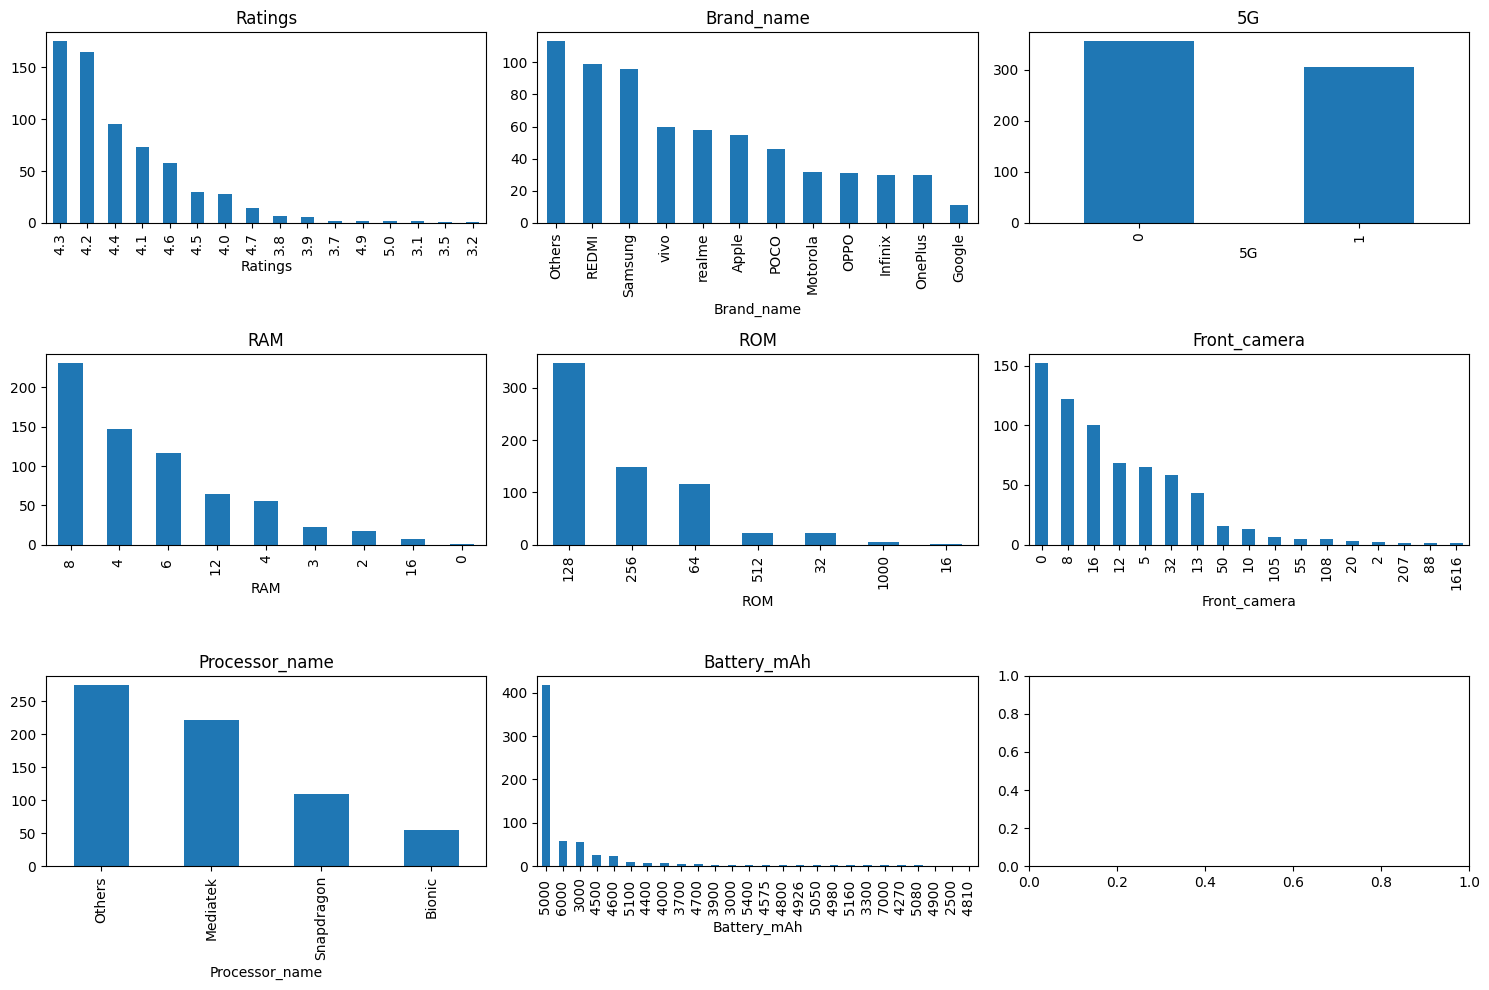

In [181]:
# checking the distribution of each column
col = ['Ratings', 'Brand_name', '5G', 'RAM', 'ROM', 'Front_camera',
       'Processor_name', 'Battery_mAh']

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()


for i, col_name in enumerate(col):

    df[col_name].value_counts().plot(kind="bar", ax=axes[i])

    axes[i].set_title(col_name)

plt.tight_layout()
plt.show()

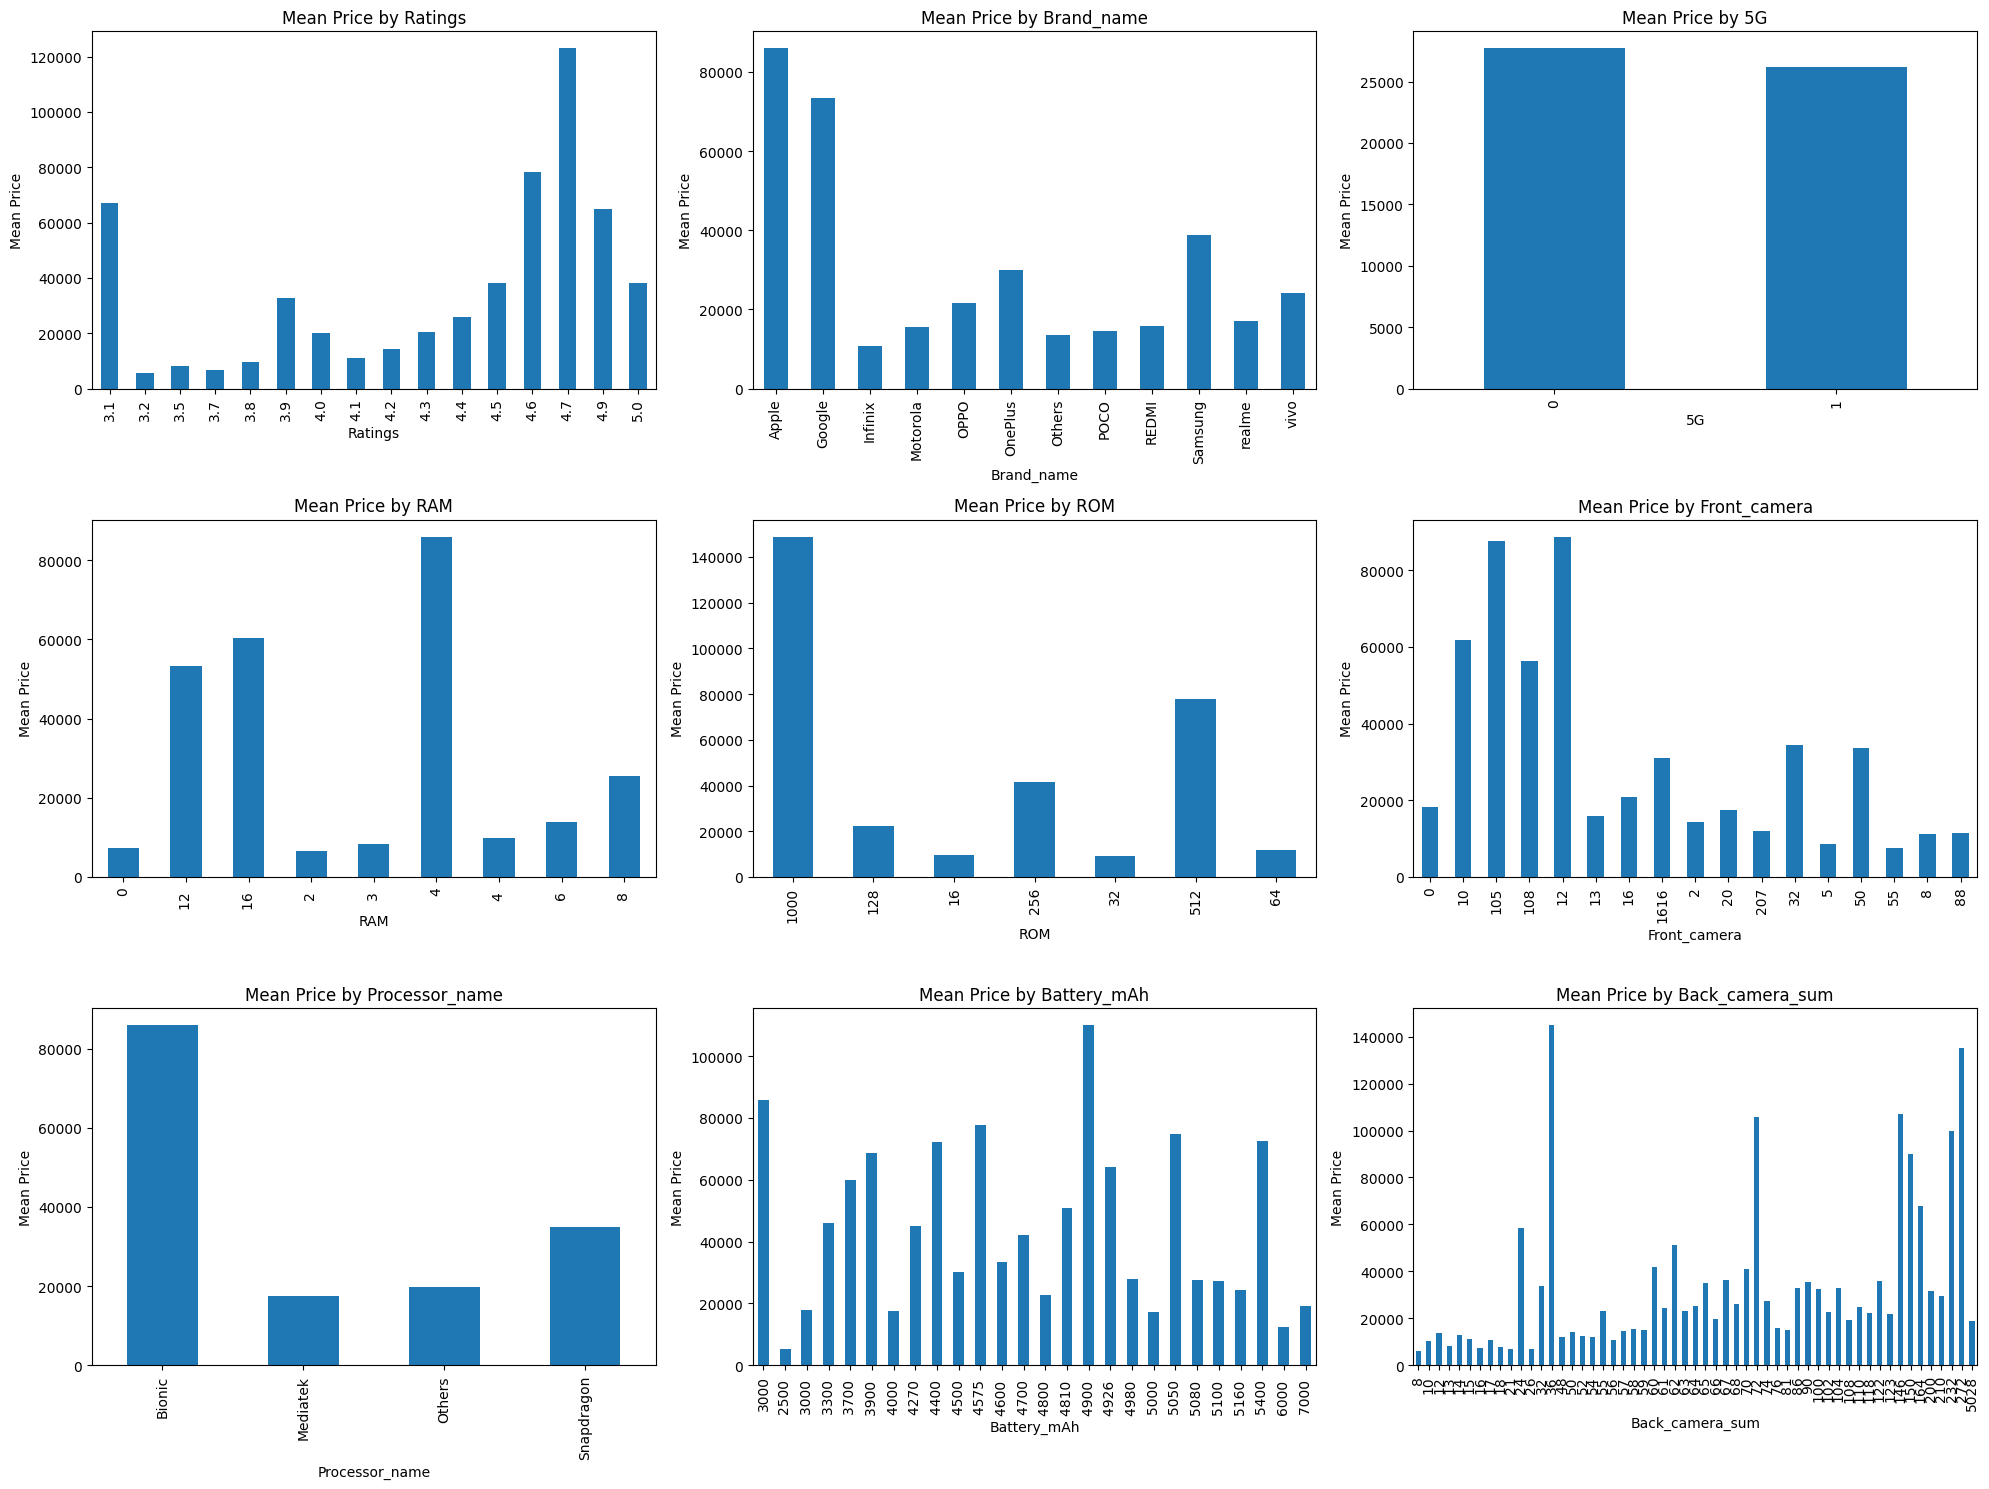

In [187]:
import matplotlib.pyplot as plt

col = ['Ratings', 'Brand_name', '5G', 'RAM', 'ROM', 'Front_camera', 'Processor_name', 'Battery_mAh', 'Back_camera_sum']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create bar plots
for i, ax in enumerate(col):
    # Group by the column, calculate the mean price, and plot as a bar chart
    df.groupby(col[i])['Price'].mean().plot(kind='bar', ax=axes[i])

    # Adding title and labels to the plot
    axes[i].set_title(f'Mean Price by {col[i]}')
    axes[i].set_ylabel('Mean Price')
    axes[i].set_xlabel(col[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [188]:
# dropping the ouliers
df = df.drop(df[df["Front_camera"] == 1616].index)
df = df.drop(df[df["Back_camera_sum"] == 5028].index)

In [194]:
df['Price'] = df['Price'].astype("int")
df["Ratings"] = df["Ratings"].astype("int")
df['5G'] = df["5G"].astype("int")
df["Ratings_count"] = df["Ratings_count"].astype("int")
df["Reviews_count"] = df["Reviews_count"].astype('int')
df["Front_camera"] = df["Front_camera"].astype('int')
df["Battery_mAh"] = df["Battery_mAh"].astype('int')
df['RAM'] = df['RAM'].astype('int')
df['ROM'] = df['ROM'].astype('int')

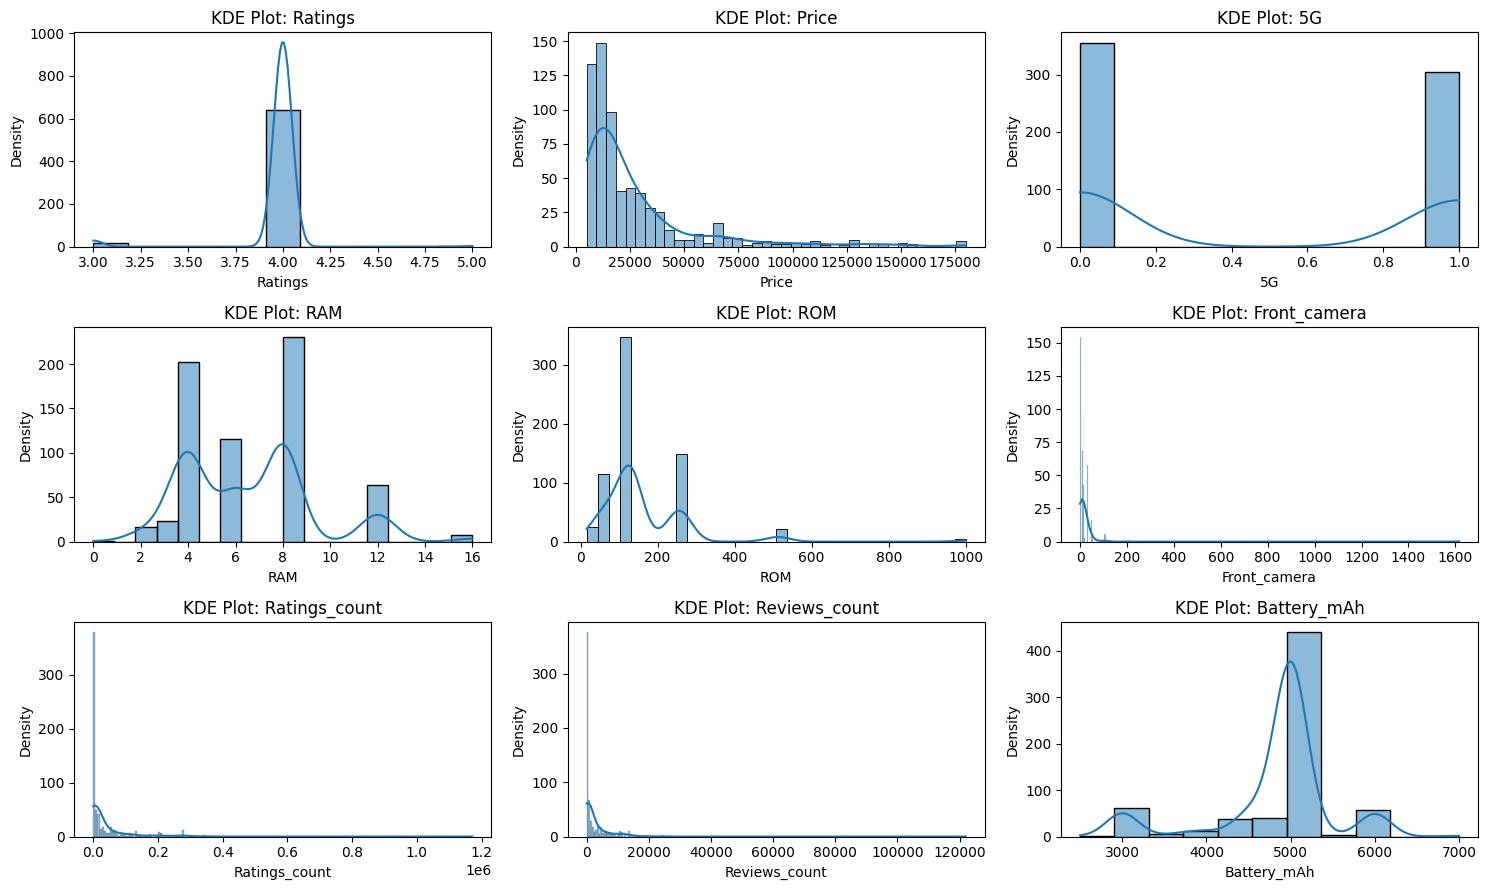

In [197]:
col = ['Ratings', 'Price', '5G', 'RAM', 'ROM', 'Front_camera', 'Ratings_count', 'Reviews_count', 'Battery_mAh']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 9))
axes = axes.flatten()

# Loop through the columns and create KDE + histogram plots
for i, col_name in enumerate(col):
    sns.histplot(df[col_name], kde=True, ax=axes[i])
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'KDE Plot: {col_name}')

# Adjust layout
plt.tight_layout()
plt.show()

In [198]:
correlation = df[['Ratings', 'Price', '5G', 'RAM', 'ROM', 'Front_camera','Ratings_count', 'Reviews_count', 'Battery_mAh',
       'Back_camera_sum']].corr()

In [199]:
correlation

,Ratings,Price,5G,RAM,ROM,Front_camera,Ratings_count,Reviews_count,Battery_mAh,Back_camera_sum
Ratings,1.000000,0.032627,0.083186,0.103887,0.072961,0.013968,0.050661,0.034114,0.123171,0.090394
Price,0.032627,1.000000,-0.025806,0.245539,0.600722,0.068934,0.006747,-0.029019,-0.584791,0.299195
5G,0.083186,-0.025806,1.000000,0.434330,0.211371,-0.030551,-0.137378,-0.091775,0.214916,0.376291
RAM,0.103887,0.245539,0.434330,1.000000,0.475338,0.151109,-0.200858,-0.139239,0.171498,0.558973
ROM,0.072961,0.600722,0.211371,0.475338,1.000000,0.060931,-0.089422,-0.093725,-0.212476,0.370706
Front_camera,0.013968,0.068934,-0.030551,0.151109,0.060931,1.000000,-0.019323,-0.007036,-0.010575,0.063610
Ratings_count,0.050661,0.006747,-0.137378,-0.200858,-0.089422,-0.019323,1.000000,0.937312,-0.228256,-0.151780
Reviews_count,0.034114,-0.029019,-0.091775,-0.139239,-0.093725,-0.007036,0.937312,1.000000,-0.139946,-0.105631
Battery_mAh,0.123171,-0.584791,0.214916,0.171498,-0.212476,-0.010575,-0.228256,-0.139946,1.000000,0.126825
Back_camera_sum,0.090394,0.299195,0.376291,0.558973,0.370706,0.063610,-0.151780,-0.105631,0.126825,1.000000


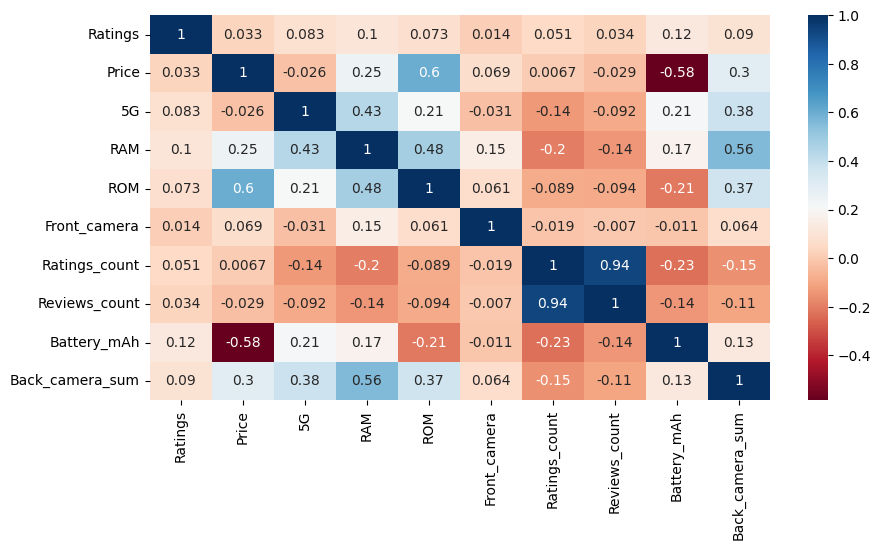

In [200]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap="RdBu")
plt.show()

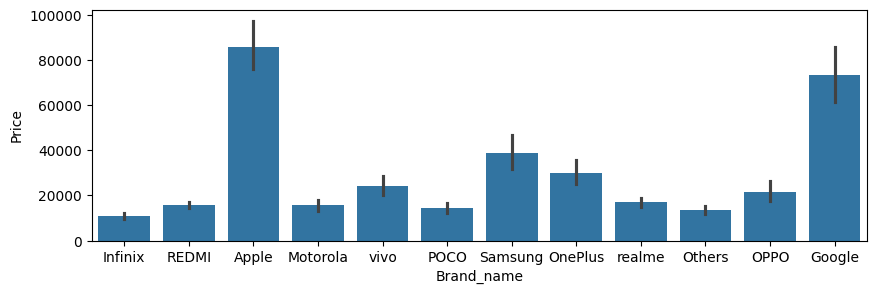

In [201]:
plt.figure(figsize=(10,3))
sns.barplot(x= "Brand_name", y="Price", data=df)
plt.show()

### Findings after Data Analysis:

- Maximum Smartphones have been rated more than 4 out of 5.
- Maximum Smartphones have more than 4Gb of RAM.
- Maximum Smartphones have more than 64Gb of ROM.
- Most Smartphones have Mediatek Processors followed by Snapdragon.
- Most Smartphones have 5000 mAh of battery.
- With increase Ratings the Prices of Smartphones also increases.
- Apple and Google are the most costliest Smartphones.
- Both 4g ang 5g Smartphones almost have same price values.
- The distribution of the Price, Reviews and Ratings_count are higly Right Skewed.
- Price have a high postivie Correlation with ROM.
- Price have a slight positive Correlation with Back_Camera, Front_Camera, RAM.

# Step 5: Model Selection, Training & Evaluation

In [203]:
df.sample(3)

,Ratings,Price,Brand_name,5G,RAM,ROM,Front_camera,Processor_name,Ratings_count,Reviews_count,Battery_mAh,Back_camera_sum
638,4,10999,OPPO,0,4,128,5,Mediatek,402,20,5000,52
704,4,10999,Others,0,4,128,16,Mediatek,50081,8302,5000,57
768,4,6499,Others,0,4,64,0,Others,570,40,6000,13


In [204]:
ml_df = df.drop(columns = ['Ratings', 'Ratings_count', 'Reviews_count', 'Battery_mAh'])
ml_df.sample(5)

,Price,Brand_name,5G,RAM,ROM,Front_camera,Processor_name,Back_camera_sum
876,7499,REDMI,0,3,32,0,Others,13
904,30890,Others,0,12,256,1616,Mediatek,68
244,11349,Samsung,1,4,128,0,Others,50
614,39999,OPPO,1,12,256,32,Mediatek,90
398,79999,Samsung,1,8,256,12,Others,72


In [205]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 983
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            660 non-null    int64 
 1   Brand_name       660 non-null    object
 2   5G               660 non-null    int64 
 3   RAM              660 non-null    int64 
 4   ROM              660 non-null    int64 
 5   Front_camera     660 non-null    int64 
 6   Processor_name   660 non-null    object
 7   Back_camera_sum  660 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 46.4+ KB


In [206]:
ml_df.to_csv("/content/drive/MyDrive/projects/Machine Learning Project (SmartPhone Price Prediction)/final_dataset_ml.csv", index = False)

In [207]:
ml_df = pd.read_csv("/content/drive/MyDrive/projects/Machine Learning Project (SmartPhone Price Prediction)/final_dataset_ml.csv")

# Machine learning Algorithms

In [208]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            660 non-null    int64 
 1   Brand_name       660 non-null    object
 2   5G               660 non-null    int64 
 3   RAM              660 non-null    int64 
 4   ROM              660 non-null    int64 
 5   Front_camera     660 non-null    int64 
 6   Processor_name   660 non-null    object
 7   Back_camera_sum  660 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 41.4+ KB


In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [211]:
# metrics to check the performace of the regression model
from sklearn.metrics import mean_squared_error, r2_score
def model_performance(y_test, y_predict):
    print("mean sqaure error:", mean_squared_error(y_test, y_predict))
    print("root mean sqaure error:", np.sqrt(mean_squared_error(y_test, y_predict)))
    print("R2 score:", r2_score(y_test, y_predict))

In [212]:
categorical_columns = ['Brand_name', 'Processor_name']
df_encoded = pd.get_dummies(ml_df, columns=categorical_columns)


In [213]:
df_encoded.sample(5)

,Price,5G,RAM,ROM,Front_camera,Back_camera_sum,Brand_name_Apple,Brand_name_Google,Brand_name_Infinix,Brand_name_Motorola,...,Brand_name_Others,Brand_name_POCO,Brand_name_REDMI,Brand_name_Samsung,Brand_name_realme,Brand_name_vivo,Processor_name_Bionic,Processor_name_Mediatek,Processor_name_Others,Processor_name_Snapdragon
540,18999,1,8,256,13,58,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
547,11499,0,4,64,16,57,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
327,21999,1,8,128,16,66,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
69,11499,1,6,128,8,52,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
620,8840,0,3,32,0,8,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [216]:
# Convert all boolean columns to integers
df_encoded = df_encoded.astype(int)


In [217]:
df_encoded.sample(5)

,Price,5G,RAM,ROM,Front_camera,Back_camera_sum,Brand_name_Apple,Brand_name_Google,Brand_name_Infinix,Brand_name_Motorola,...,Brand_name_Others,Brand_name_POCO,Brand_name_REDMI,Brand_name_Samsung,Brand_name_realme,Brand_name_vivo,Processor_name_Bionic,Processor_name_Mediatek,Processor_name_Others,Processor_name_Snapdragon
549,86999,0,4,512,12,24,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,17999,1,8,128,16,66,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
127,82999,0,4,128,12,60,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
88,33999,1,12,256,32,122,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
266,39999,1,8,128,10,72,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [219]:
df_encoded.columns

Index(['Price', '5G', 'RAM', 'ROM', 'Front_camera', 'Back_camera_sum',
       'Brand_name_Apple', 'Brand_name_Google', 'Brand_name_Infinix',
       'Brand_name_Motorola', 'Brand_name_OPPO', 'Brand_name_OnePlus',
       'Brand_name_Others', 'Brand_name_POCO', 'Brand_name_REDMI',
       'Brand_name_Samsung', 'Brand_name_realme', 'Brand_name_vivo',
       'Processor_name_Bionic', 'Processor_name_Mediatek',
       'Processor_name_Others', 'Processor_name_Snapdragon'],
      dtype='object')

In [220]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Price                      660 non-null    int64
 1   5G                         660 non-null    int64
 2   RAM                        660 non-null    int64
 3   ROM                        660 non-null    int64
 4   Front_camera               660 non-null    int64
 5   Back_camera_sum            660 non-null    int64
 6   Brand_name_Apple           660 non-null    int64
 7   Brand_name_Google          660 non-null    int64
 8   Brand_name_Infinix         660 non-null    int64
 9   Brand_name_Motorola        660 non-null    int64
 10  Brand_name_OPPO            660 non-null    int64
 11  Brand_name_OnePlus         660 non-null    int64
 12  Brand_name_Others          660 non-null    int64
 13  Brand_name_POCO            660 non-null    int64
 14  Brand_name_REDMI          

In [221]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler
# Creating object
ss= StandardScaler()

# Fit and Transform
X_train_scaled= ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [224]:
X_train_scaled

array([[ 1.07885793,  0.52408942, -0.2713875 , ...,  1.39632398,
        -0.8385856 , -0.45025935],
       [ 1.07885793,  0.52408942, -0.2713875 , ..., -0.71616617,
        -0.8385856 ,  2.2209422 ],
       [-0.92690611,  0.52408942, -0.2713875 , ...,  1.39632398,
        -0.8385856 , -0.45025935],
       ...,
       [ 1.07885793,  0.52408942,  0.82244914, ..., -0.71616617,
         1.19248411, -0.45025935],
       [-0.92690611, -0.93617028, -0.2713875 , ..., -0.71616617,
        -0.8385856 , -0.45025935],
       [-0.92690611, -0.20604043, -0.2713875 , ...,  1.39632398,
        -0.8385856 , -0.45025935]])

In [225]:
y_train

18     14999
363    45999
597    17999
541     8450
61     18863
       ...  
71      8499
106    27999
270    19900
435    50999
102     6999
Name: Price, Length: 528, dtype: int64

## Machine Learning Model 1 (Linear Regression)


In [226]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_linear_pred = lr.predict(X_test_scaled)

In [227]:

# Evaluate model performance
model_performance(y_test, y_linear_pred)

mean sqaure error: 289329933.72772205
root mean sqaure error: 17009.701165150494
R2 score: 0.7496803873531527


#### The performance of Linear Regression is worst, so applying another machine learning algorithm.

## Machine Learning Model 2 (RandomForestRegressor)

In [228]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=50, max_depth=18)

# fit the regressor with X and Y data
RF_TreeR.fit(X_train_scaled, y_train)

# predict the model

y_test_RFtree_pred= RF_TreeR.predict(X_test_scaled)

In [229]:
model_performance(y_test, y_test_RFtree_pred)

mean sqaure error: 31392111.47416272
root mean sqaure error: 5602.8663623330085
R2 score: 0.9728404832395462


In [232]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Creating RandomForestRegressor instance
RF_tree = RandomForestRegressor()

# Defining parameters
parameters = {
    'n_estimators': [5, 10, 25, 30, 35],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_leaf': [0.5, 1, 2, 3, 4]
}

# Train the model using GridSearchCV
RF_treeG = GridSearchCV(RF_tree, parameters, n_jobs=-1, scoring='neg_mean_squared_error', cv=3, verbose=3)
RF_treeG.fit(X_train_scaled, y_train)

# Predict the output
y_test_grid_RFtree_pred = RF_treeG.predict(X_test_scaled)

# Printing the best parameters obtained by GridSearchCV
print(f"The best values found out to be: {RF_treeG.best_params_}")
print(f"Negative mean square error is: {RF_treeG.best_score_}")


Fitting 3 folds for each of 125 candidates, totalling 375 fits
The best values found out to be: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 25}
Negative mean square error is: -91215239.8968138


In [233]:
model_performance(y_test, y_test_grid_RFtree_pred)

mean sqaure error: 39771193.724921085
root mean sqaure error: 6306.440654197983
R2 score: 0.9655911516673773


#### The performance of Random Forest Regression is better than Linear Regression but not up to the mark, so applying another machine learning algorithm.

## Machine Learning Model 3 (XGBRegressor)

In [234]:
# ML Model - 3 Implementation
# import the regressor
from xgboost import XGBRegressor

# create a regressor object
xgbR = XGBRegressor()

# fit the regressor with X and Y data
xgbR.fit(X_train_scaled, y_train)

# predict the model
y_test_xgbR_pred= xgbR.predict(X_test_scaled)

In [235]:
model_performance(y_test, y_test_xgbR_pred)

mean sqaure error: 27825383.762841433
root mean sqaure error: 5274.977133869059
R2 score: 0.975926309471252


In [236]:
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.1, 0.5, 0.2, 0.3, 0.4],"max_depth":[2,4,6,8,10]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(X_train_scaled,y_train)

# Predict the output
y_test_rand_xgbR_pred = xgb_Rand_R.predict(X_test_scaled)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
The best alpha value found out to be: {'learning_rate': 0.3, 'max_depth': 6}
Negative mean square error is: -79247586.2468558


In [237]:
model_performance(y_test, y_test_rand_xgbR_pred)

mean sqaure error: 27825383.762841433
root mean sqaure error: 5274.977133869059
R2 score: 0.975926309471252


## Taking XGB as my Final ml Algorithm to predict the price of the smartphone.

In [238]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the data
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))  # XGBoost regressor
])


In [239]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [240]:
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 2448.980535333807
MSE: 27825383.762841433
R² Score: 0.975926309471252


In [241]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
